# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
# Carregando o arquivo
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
# Verificar as colunas
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Verificar os tipos de variáveis
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Verificando se há NaN
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
# Removendo as linhas sem valor
data = data.dropna()
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Removendo as colunas irrelevantes e definindo X
X = data.drop(columns = ['longitude', 'latitude', 'median_house_value', 'ocean_proximity']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20433 non-null  float64
 1   total_rooms         20433 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20433 non-null  float64
 4   households          20433 non-null  float64
 5   median_income       20433 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB
None


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [10]:
# Definindo y
y = data.loc[:, 'median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [12]:
# Calculando a matriz de correlação
corr = X.corr()
corr

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000


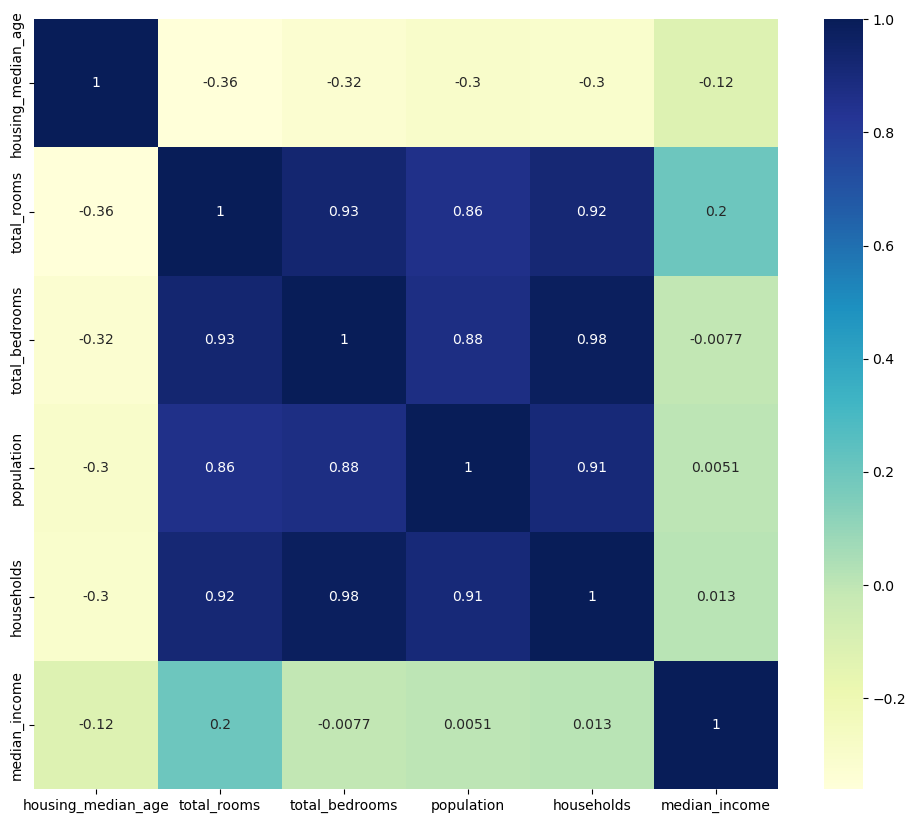

In [13]:
# Criando um heatmap com seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

Os insights relevantes a partir da análise da matriz de correlação fornecida podem ser resumidos nas seguintes observações:

## Relações entre Variáveis

1. **Correlação Forte entre Total de Quartos e Total de Quartos**: A correlação de 0,93 entre `total_rooms` e `total_bedrooms` indica que, em geral, áreas com mais quartos também têm mais dormitórios. Isso sugere que as propriedades tendem a ser projetadas com uma proporção consistente de quartos e dormitórios.

2. **Impacto da População**: As correlações significativas entre `population`, `total_rooms` (0,86) e `total_bedrooms` (0,88) indicam que áreas com maior população tendem a ter mais quartos e dormitórios. Isso pode refletir uma demanda maior por habitação em áreas densamente povoadas.

3. **Idade da Habitação**: A variável `housing_median_age` apresenta correlações negativas com todas as outras variáveis, especialmente com `total_rooms` (-0,36) e `total_bedrooms` (-0,32). Isso sugere que casas mais antigas tendem a ter menos quartos e dormitórios, possivelmente devido a padrões de construção mais antigos que não atendem às necessidades modernas.

4. **Relação Fraca com Renda**: A correlação de `median_income` com outras variáveis é fraca (próxima de zero), indicando que a renda dos residentes não está fortemente relacionada ao número de quartos ou dormitórios disponíveis. Isso pode sugerir que fatores como localização e tipo de habitação têm um papel mais significativo na determinação do espaço habitacional do que pdfdo rapidamente.

### 3. Separe os dados em validação e teste

In [16]:
# Separação dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [18]:
# Treinando a primeira árvore com profundidade máxima = 8
tree1 = DecisionTreeRegressor(max_depth=8)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [19]:
# Treinando a primeira árvore com profundidade máxima = 2
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [21]:
# Fazendo previsões na base de treinamento
train_preds_tree1 = tree1.predict(X_train)
train_preds_tree2 = tree2.predict(X_train)

# Calculando o MSE para a base de treinamento
mse_train_tree1 = mean_squared_error(y_train, train_preds_tree1)
mse_train_tree2 = mean_squared_error(y_train, train_preds_tree2)

print("MSE da Árvore 1 na base de treinamento: ", mse_train_tree1)
print("MSE da Árvore 2 na base de treinamento: ", mse_train_tree2)

MSE da Árvore 1 na base de treinamento:  4700951059.575128
MSE da Árvore 2 na base de treinamento:  7301485444.050299


In [22]:
# Fazendo previsões na base de testes
test_preds_tree1 = tree1.predict(X_test)
test_preds_tree2 = tree2.predict(X_test)

# Calculando o MSE para a base de testes
mse_test_tree1 = mean_squared_error(y_test, test_preds_tree1)
mse_test_tree2 = mean_squared_error(y_test, test_preds_tree2)

print("MSE da Árvore 1 na base de testes: ", mse_test_tree1)
print("MSE da Árvore 2 na base de testes: ", mse_test_tree2)

MSE da Árvore 1 na base de testes:  6058397403.755334
MSE da Árvore 2 na base de testes:  7608731340.045521


In [23]:
# Calculando o R² para a base de treinamento
r2_train_tree1 = r2_score(y_train, train_preds_tree1)
r2_train_tree2 = r2_score(y_train, train_preds_tree2)

print("R² da Árvore 1 na base de treinamento: ", r2_train_tree1)
print("R² da Árvore 2 na base de treinamento: ", r2_train_tree2)
print("")
# Calculando o R² para a base de testes
r2_test_tree1 = r2_score(y_test, test_preds_tree1)
r2_test_tree2 = r2_score(y_test, test_preds_tree2)

print("R² da Árvore 1 na base de testes: ", r2_test_tree1)
print("R² da Árvore 2 na base de testes: ", r2_test_tree2)

R² da Árvore 1 na base de treinamento:  0.6448595428838954
R² da Árvore 2 na base de treinamento:  0.44839823998062045

R² da Árvore 1 na base de testes:  0.5569786243750385
R² da Árvore 2 na base de testes:  0.4436101826304275


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

#### <font color="green">   A árvore que parece mais adequada é `tree1` com profundidade = 8</font>

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

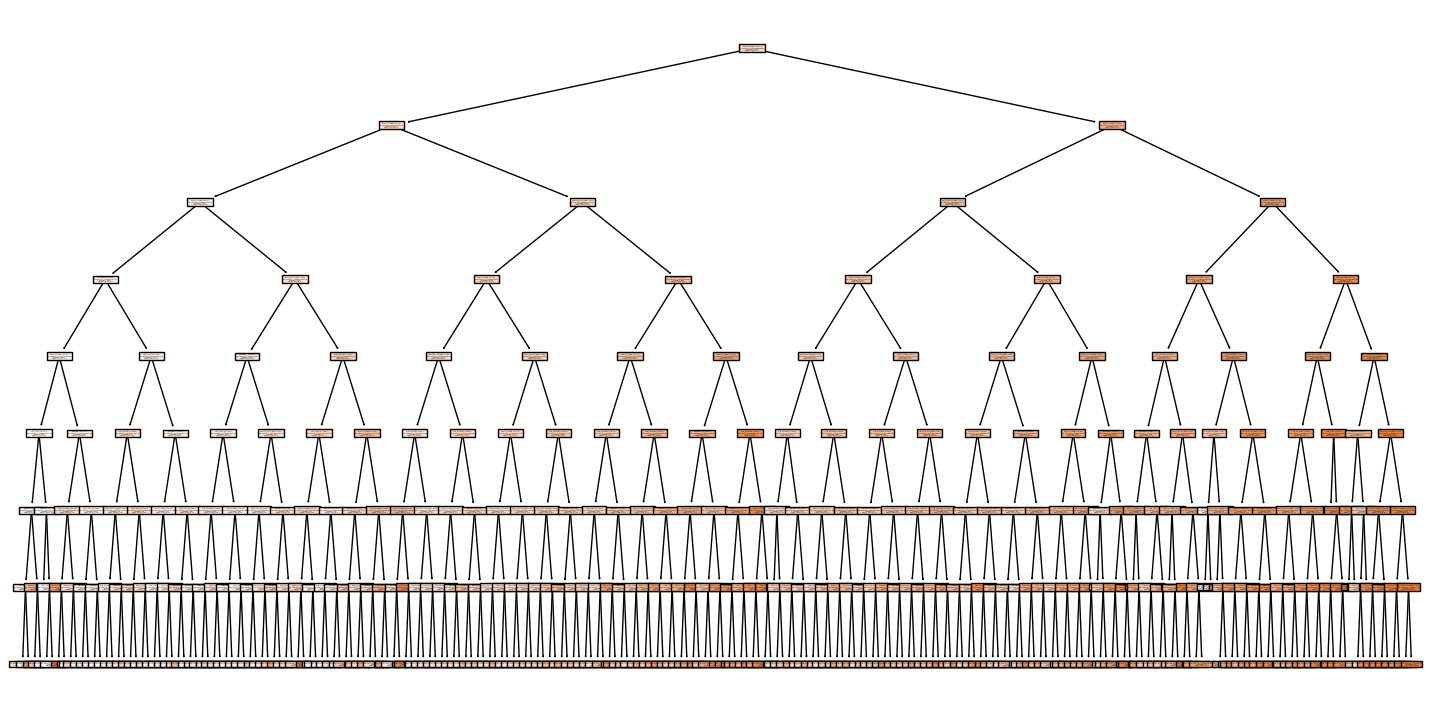

In [53]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=tree1, 
                    feature_names=X.columns, 
                    filled=True)

In [56]:
text_tree_print = tree.export_text(decision_tree=tree1)

print(text_tree_print)

|--- feature_5 <= 5.04
|   |--- feature_5 <= 3.11
|   |   |--- feature_5 <= 2.51
|   |   |   |--- feature_4 <= 524.50
|   |   |   |   |--- feature_5 <= 1.96
|   |   |   |   |   |--- feature_1 <= 659.50
|   |   |   |   |   |   |--- feature_3 <= 1183.00
|   |   |   |   |   |   |   |--- feature_3 <= 27.50
|   |   |   |   |   |   |   |   |--- value: [197153.33]
|   |   |   |   |   |   |   |--- feature_3 >  27.50
|   |   |   |   |   |   |   |   |--- value: [122136.45]
|   |   |   |   |   |   |--- feature_3 >  1183.00
|   |   |   |   |   |   |   |--- feature_5 <= 1.19
|   |   |   |   |   |   |   |   |--- value: [433334.00]
|   |   |   |   |   |   |   |--- feature_5 >  1.19
|   |   |   |   |   |   |   |   |--- value: [254166.67]
|   |   |   |   |   |--- feature_1 >  659.50
|   |   |   |   |   |   |--- feature_3 <= 49.50
|   |   |   |   |   |   |   |--- value: [500001.00]
|   |   |   |   |   |   |--- feature_3 >  49.50
|   |   |   |   |   |   |   |--- feature_1 <= 1431.50
|   |   |   |   |   |